# ДЗ4
## Задание 1
Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [30]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [27]:
# импортируем модули
from pymystem3 import Mystem 
from string import punctuation
import matplotlib
import matplotlib.pyplot as plt
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

# сохранение лемматизированного текста в отдельный файл и проверка на закон Ципфа
all_text = []
lemmas = []
punct = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-"
with open('Harry_potter.txt', 'r', encoding = 'utf-8') as hp:
    # очищаем текст от пунктуации и приводим к нижнму регистру
    for line in hp:
        # очищаем от тире (в тексте они не отделены пробелами от соседних слов, поэтому приходится делать это на этой стадии)
        new_line = list(line)
        line = []
        for x in new_line:
            if x == "—": line.append(" ")
            else: line.append(x)
        # очищаем от остальной пунктуации
        ## соединяем буквы в слова
        line = "".join(line)
        line = line.split()
        # удаляем пунктуацию
        for a in line:
            a = a.strip(punct)              
            a = a.lower()
            all_text.append(a)
all_text = " ".join(all_text)
# лемматизация (Оксана сказала пользоваться лемматизатором NLTK без подачи части речи после токенизации)
for line in word_tokenize(all_text):
    lemmatized_line = wnl.lemmatize(line)
    lemmas.append(lemmatized_line) 
# запись лемм в новый файл
lemmas = " ".join(lemmas)
with open('Lemmatized_Harry_Potter.txt', 'w', encoding = 'utf-8') as lhp:
    lhp.write(lemmas)

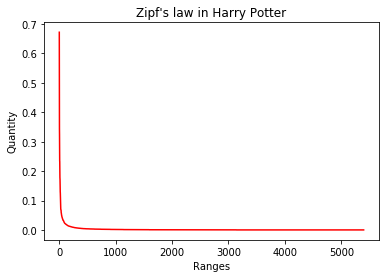

In [28]:
# проверка закона Ципфа
prepared_text = []
with open('Lemmatized_Harry_Potter.txt', 'r', encoding = 'utf-8') as lhp:
    for line in lhp:
        line = line.split()
        for word in line:
            prepared_text.append(word)
# сортируем слова
counts = {}
for word in prepared_text:
    counts[word] = counts.get(word, 0) + 1
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# делаем график
c = 0
ranges = []
quantity = []
for line in sorted_counts:
    c += 1
    ranges.append(c)
    quantity.append(line[1]/len(sorted_counts))
plt.plot(ranges, quantity, c ='red')
plt.title("Zipf's law in Harry Potter")
plt.xlabel("Ranges")
plt.ylabel("Quantity")
plt.show()

## Задание 2
Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

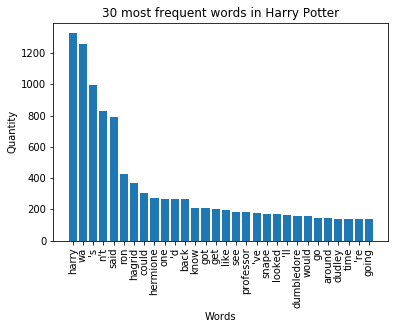

In [29]:
# из файла с леммами достаем список лемм
prepared_text = []
with open('Lemmatized_Harry_Potter.txt', 'r', encoding = 'utf-8') as lhp:
    for line in lhp:
        line = line.split()
        for word in line:
            prepared_text.append(word)
# удаляем стоп-слова
from nltk.corpus import stopwords
sw = stopwords.words('english')
filtered_text = [w for w in prepared_text if w not in sw]
# считаем абсолютную частоту
counts = {}
for word in filtered_text:
    counts[word] = counts.get(word, 0) + 1
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# строим график
# создаем набор значений (подписи слов и его позиция в частотном списке)
X = []
os_X = []
Y = []
i = 0
for x in sorted_counts[:30]:
    os_X.append(x[0]) # добавляем слово в список названий по оси Х
    i += 1 
    X.append(i) # добавляем номер слова в список значений по оси X
    Y.append(x[1]) # добавляем абсолютную частотность слова в список значений по оси Y
plt.xticks(X, os_X, rotation=90)
plt.title("30 most frequent words in Harry Potter")
plt.xlabel("Words")
plt.ylabel("Quantity")
plt.bar(X, Y)
plt.show()
